
# General Plotting
## Primary Results
### Time Domain

In [ ]:
import os
import numpy as np
import pylab as plt
from pandas import read_csv

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## File parameters.
labels = ['dacc-lh', 'dacc-rh', 'dmpfc-lh', 'dmpfc-rh', 'dlpfc_1-lh', 'dlpfc_1-rh', 'dlpfc_2-lh', 'dlpfc_2-rh', 
          'dlpfc_3-lh', 'dlpfc_3-rh', 'dlpfc_4-lh', 'dlpfc_4-rh', 'dlpfc_5-lh', 'dlpfc_5-rh', 
          'dlpfc_6-lh', 'dlpfc_6-rh', 'pcc-lh', 'pcc-rh', 'racc-lh', 'racc-rh']
# labels = ['FCZ']

space = 'source'
model_name = 'revised'

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
root_dir = '/space/sophia/2/users/EMOTE-DBS/afMSIT/%s' %space
img_dir = '/space/sophia/2/users/EMOTE-DBS/afMSIT/plots/%s' %space
info = read_csv(os.path.join(root_dir, 'afMSIT_%s_info.csv' %space))

for label in labels:

    for freq in [15]:

        ## Intialize figure.
        fig = plt.figure(figsize=(16,8))
        axes = []
        
        ## Initialize labels.
        if space == 'sensor': ylabel = 'Voltage (uV)'
        elif space == 'source': ylabel = 'dSPM'
        title = '%s ERP' %(label.replace('_',' ').upper())
        out_path = os.path.join(img_dir, 'timedomain', '%s_%s.png' %(model_name,title.replace(' ','_').lower()))
            
        for n, analysis in enumerate(['stim', 'resp']):
 
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Load data.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

            ## Load source data.
            npz = np.load(os.path.join(root_dir, 'afMSIT_%s_%s_%s_%s.npz' %(space,analysis,label,freq)))
            data = npz['data']
            times = npz['times']
            
            ## Load cluster results.
            f = os.path.join(root_dir, 'results', '%s_%s_timedomain_results.csv' %(model_name, analysis))
            clusters = read_csv(f)
            
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Plot DBS Difference.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            
            ax = plt.subplot2grid((2,2),(n,0))
            for m, color, legend in zip([0,1],['#0571b0','#ca0020'],['DBSoff','DBSon']):
                
                ix, = np.where(info.DBS==m)
                mu = data[ix].mean(axis=0)
                se = data[ix].std(axis=0) / np.sqrt(len(ix))
                ax.plot(times, mu, linewidth=2, color=color, label=legend)
                ax.fill_between(times, mu-se, mu+se, color=color, alpha=0.2)
        
            ## Plot significant clusters.
            for ix in np.where((clusters.Label==label)&(clusters.Freq==freq)&
                               (clusters.Contrast=='DBS')&(clusters.FDR<0.05))[0]:
                y1, y2 = ax.get_ylim()
                tmin, tmax = clusters.loc[ix,'Tmin'], clusters.loc[ix,'Tmax']
                ax.fill_between(np.linspace(tmin,tmax,1e3), y1, y2, color='k', alpha=0.2) 
                ax.set_ylim(y1,y2)
                
            axes.append(ax)
                
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Plot Interference Difference.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

            ax = plt.subplot2grid((2,2),(n,1))
            for m, color, legend in zip([0,1],['#7b3294','#008837'],['Neu','Int']):
                
                ix, = np.where(info.Interference==m)
                mu = data[ix].mean(axis=0)
                se = data[ix].std(axis=0) / np.sqrt(len(ix))
                ax.plot(times, mu, linewidth=2, color=color, label=legend)
                ax.fill_between(times, mu-se, mu+se, color=color, alpha=0.2)
                
            ## Plot significant clusters.
            for ix in np.where((clusters.Label==label)&(clusters.Freq==freq)&
                               (clusters.Contrast=='Interference')&(clusters.FDR<0.05))[0]:
                y1, y2 = ax.get_ylim()
                tmin, tmax = clusters.loc[ix,'Tmin'], clusters.loc[ix,'Tmax']
                ax.fill_between(np.linspace(tmin,tmax,1e3), y1, y2, color='k', alpha=0.2)    
                ax.set_ylim(y1,y2)
            
            axes.append(ax)
            
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        ### Add Flourishes
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

        for i, ax in enumerate(axes):

            ax.legend(loc=2, fontsize=18, markerscale=2, frameon=False, borderpad=0, handletextpad=0.2)
            ax.set_xlabel('Time (s)', fontsize=18)
            if not i%2: ax.set_ylabel(ylabel, fontsize=20)
            ax.tick_params(axis='both', which='major', labelsize=12)
            if not i/2: ax.set_title('Stimulus-Locked', fontsize=24)
            else: ax.set_title('Response-Locked', fontsize=24)

            ## Time-lock specific.
            if not i/2:
                y1, y2 = ax.get_ylim()
                for x,s in zip([0, 0.4, 1.127],['IAPS','MSIT','Resp']): 
                    ax.text(x+0.02,y1+np.abs(y1*0.05),s,fontsize=16)
                    ax.vlines(x,y1,y2,linestyle='--',alpha=0.3)
                ax.set_ylim(y1,y2)

            else:
                y1, y2 = ax.get_ylim()
                ax.text(0.02,y1+np.abs(y1*0.05),'Resp',fontsize=16)
                ax.vlines(0.0,y1,y2,linestyle='--',alpha=0.3)
                ax.set_ylim(y1,y2)

        plt.suptitle(title, y=0.99, fontsize=28)
        plt.subplots_adjust(left=0.05, right=0.975, hspace=0.35, wspace=0.15)
        #plt.show()
        plt.savefig(out_path)
        plt.close()

print 'Done.'

### Power Domain

In [ ]:
import os
import numpy as np
import pylab as plt
from pandas import read_csv

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## File parameters.
labels = ['dacc-lh', 'dacc-rh', 'dmpfc-lh', 'dmpfc-rh', 'dlpfc_1-lh', 'dlpfc_1-rh', 'dlpfc_2-lh', 'dlpfc_2-rh', 
          'dlpfc_3-lh', 'dlpfc_3-rh', 'dlpfc_4-lh', 'dlpfc_4-rh', 'dlpfc_5-lh', 'dlpfc_5-rh', 
          'dlpfc_6-lh', 'dlpfc_6-rh', 'pcc-lh', 'pcc-rh', 'racc-lh', 'racc-rh']
# labels = ['FCZ']

space = 'source'
model_name = 'revised'
baseline = (-0.5, -0.1)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
root_dir = '/space/sophia/2/users/EMOTE-DBS/afMSIT/%s' %space
img_dir = '/space/sophia/2/users/EMOTE-DBS/afMSIT/plots/%s' %space
info = read_csv(os.path.join(root_dir, 'afMSIT_%s_info.csv' %space))

for label in labels:

    for freq in ['theta','alpha','beta']:

        ## Intialize figure.
        fig = plt.figure(figsize=(16,8))
        axes = []
        
        ## Initialize labels.
        ylabel = 'Power (dB)'
        title = '%s %s Power' %(label.replace('_',' ').upper(), freq.capitalize())
        out_path = os.path.join(img_dir, 'frequency', '%s_%s.png' %(model_name,title.replace(' ','_').lower()))
            
        for n, analysis in enumerate(['stim', 'resp']):
 
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Load data.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

            ## Load source data.
            npz = np.load(os.path.join(root_dir, 'afMSIT_%s_%s_%s_%s.npz' %(space,analysis,label,freq)))
            data = npz['data']
            times = npz['times']
            
            ## Load cluster results.
            f = os.path.join(root_dir, 'results', '%s_%s_frequency_results.csv' %(model_name, analysis))
            clusters = read_csv(f)
            
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Plot DBS Difference.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            
            ax = plt.subplot2grid((2,2),(n,0))
            for m, color, legend in zip([0,1],['#0571b0','#ca0020'],['DBSoff','DBSon']):
                
                ix, = np.where(info.DBS==m)
                mu = data[ix].mean(axis=0)
                if analysis == 'stim': mu -= mu[(times >= baseline[0])&(times <= baseline[1])].mean()
                se = data[ix].std(axis=0) / np.sqrt(len(ix))
                ax.plot(times, mu, linewidth=2, color=color, label=legend)
                ax.fill_between(times, mu-se, mu+se, color=color, alpha=0.2)
        
            ## Plot significant clusters.
            for ix in np.where((clusters.Label==label)&(clusters.Freq==freq)&
                               (clusters.Contrast=='DBS')&(clusters.FDR<0.05))[0]:
                y1, y2 = ax.get_ylim()
                tmin, tmax = clusters.loc[ix,'Tmin'], clusters.loc[ix,'Tmax']
                ax.fill_between(np.linspace(tmin,tmax,1e3), y1, y2, color='k', alpha=0.2) 
                ax.set_ylim(y1,y2)
                
            axes.append(ax)
                
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Plot Interference Difference.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

            ax = plt.subplot2grid((2,2),(n,1))
            for m, color, legend in zip([0,1],['#7b3294','#008837'],['Neu','Int']):
                
                ix, = np.where(info.Interference==m)
                mu = data[ix].mean(axis=0)
                if analysis == 'stim': mu -= mu[(times >= baseline[0])&(times <= baseline[1])].mean()
                se = data[ix].std(axis=0) / np.sqrt(len(ix))
                ax.plot(times, mu, linewidth=2, color=color, label=legend)
                ax.fill_between(times, mu-se, mu+se, color=color, alpha=0.2)
                
            ## Plot significant clusters.
            for ix in np.where((clusters.Label==label)&(clusters.Freq==freq)&
                               (clusters.Contrast=='Interference')&(clusters.FDR<0.05))[0]:
                y1, y2 = ax.get_ylim()
                tmin, tmax = clusters.loc[ix,'Tmin'], clusters.loc[ix,'Tmax']
                ax.fill_between(np.linspace(tmin,tmax,1e3), y1, y2, color='k', alpha=0.2)    
                ax.set_ylim(y1,y2)
            
            axes.append(ax)
            
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        ### Add Flourishes
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

        for i, ax in enumerate(axes):

            ax.legend(loc=2, fontsize=18, markerscale=2, frameon=False, borderpad=0, handletextpad=0.2)
            ax.set_xlabel('Time (s)', fontsize=18)
            if not i%2: ax.set_ylabel(ylabel, fontsize=20)
            ax.tick_params(axis='both', which='major', labelsize=12)
            if not i/2: ax.set_title('Stimulus-Locked', fontsize=24)
            else: ax.set_title('Response-Locked', fontsize=24)

            ## Time-lock specific.
            if not i/2:
                y1, y2 = ax.get_ylim()
                for x,s in zip([0, 0.4, 1.127],['IAPS','MSIT','Resp']): 
                    ax.text(x+0.02,y1+np.abs(y1*0.05),s,fontsize=16)
                    ax.vlines(x,y1,y2,linestyle='--',alpha=0.3)
                ax.set_ylim(y1,y2)

            else:
                y1, y2 = ax.get_ylim()
                ax.text(0.02,y1+np.abs(y1*0.05),'Resp',fontsize=16)
                ax.vlines(0.0,y1,y2,linestyle='--',alpha=0.3)
                ax.set_ylim(y1,y2)

        plt.suptitle(title, y=0.99, fontsize=28)
        plt.subplots_adjust(left=0.05, right=0.975, hspace=0.35, wspace=0.15)
        #plt.show()
        plt.savefig(out_path)
        plt.close()

print 'Done.'

## Secondary Results
### Intertrial Interval Spectra Comparison


In [ ]:
import os
import numpy as np
import pylab as plt
from cmap_utils import *

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and extract data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data.
root_dir = '/space/sophia/2/users/EMOTE-DBS/afMSIT/source'
npz = np.load( os.path.join(root_dir, 'afMSIT_source_iti_dlpfc_5-lh_spectra.npz') )

## Extract data.
power = npz['power']
times = npz['times']
freqs = npz['freqs']
dbs = (npz['conds'] > 2).astype(int)

## Compute contrasts.
dbs_off = np.log10( np.median( power[dbs==0], axis=0 ) ) * 10
dbs_on = np.log10( np.median( power[dbs==1], axis=0 ) ) * 10
contrast = dbs_on - dbs_off

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot spectrograms.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

fig, axes = plt.subplots(1,3,figsize=(15,5),sharex=True)
vmin, vmax = np.floor( np.min([dbs_off, dbs_on]) ), np.ceil( np.max([dbs_off, dbs_on]) )


## Plot DBS-off.
cmap = center_color_map(dbs_off, 'jet')
cbar = axes[0].imshow(dbs_off , aspect='auto', origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)
plt.colorbar(cbar, ax=axes[0],  ticks=np.arange(vmin, vmax+0.01, 0.5))
axes[0].set_ylabel('Frequency', fontsize=18)

## Plot DBS-on.
cmap = center_color_map(dbs_on, 'jet')
cbar = axes[1].imshow(dbs_on , aspect='auto', origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)
plt.colorbar(cbar, ax=axes[1], ticks=np.arange(vmin, vmax+0.01, 0.5))

## Plot contrast.
cmap = center_color_map(contrast, 'jet')
cbar = axes[2].imshow(contrast , aspect='auto', origin='lower', cmap=cmap, vmin=-1, vmax=1)
plt.colorbar(cbar, ax=axes[2], ticks=np.arange(-1,1.1,0.5))

## Add flourishes.
for ax, title in zip(axes, ['DBSoff', 'DBSon', 'On-Off']):
    
    ax.set_xticks(np.linspace(0, times.shape[0], 6))
    ax.set_xticklabels(np.linspace(times.min(), times.max(), 6).round(2))
    ax.set_xlabel('Time (s)', fontsize=16)
    
    ax.set_yticks([0,5,10,15,18,20,22,24])
    ax.set_yticklabels(freqs[[0,5,10,15,18,20,22,24]].astype(int))
    ax.set_title(title, fontsize=20)
    
plt.subplots_adjust(left=0.05, right=0.98, top=0.8)
plt.suptitle('Intertrial Power Spectra', fontsize=28)
plt.show()

### Intertrial Interval Power Spectrum Density

In [ ]:
import os
import numpy as np
import pylab as plt
from mne import EpochsArray, create_info
from mne.time_frequency import psd_multitaper

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Data parameters.
subjects = ['BRTU','CHDR', 'CRDA', 'JADE', 'JASE', 'M5', 'MEWA', 'S2']
method = 'dSPM'
h_freq = 50
roi = 'dlpfc_5-lh'
sfreq = 1450

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Setup.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
root_dir = '/space/sophia/2/users/EMOTE-DBS/afMSIT/source'

epochs, conds = [], []
for subject in subjects:

    ## Load NPZ.
    npz = np.load(os.path.join(root_dir, 'stcs', '%s_msit_iti_%s_%s_epochs.npz' %(subject,method,h_freq)))
    epochs.append(npz['ltcs'])
    conds.append(npz['conds'])

## Concatenate.
epochs = np.concatenate(epochs, axis=0)
conds = np.concatenate(conds, axis=0)
times = npz['times']

## Make into epochs object.
n_trials, n_channels, n_times = epochs.shape

## Make info.
info = create_info([roi], sfreq, ['eeg'])

## Make events.
events = np.zeros((n_trials,3), dtype=int)
events.T[0] = np.arange(n_trials)
events.T[-1] = conds
event_id = dict( FN=1, FI=2, NN=3, NI=4 )

epochs = EpochsArray(epochs, info, events, tmin=-1.25, event_id=event_id, verbose=False)

## Compute PSD.
psd_dbsoff, freqs = psd_multitaper(epochs[['FI','FN']], fmin=0, fmax=50, n_jobs=3, verbose=False)
psd_dbson,  freqs = psd_multitaper(epochs[['NI','NN']], fmin=0, fmax=50, n_jobs=3, verbose=False)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

for arr, label, color in zip([psd_dbsoff,psd_dbson], ['DBSoff','DBSon'], ['#0571b0','#ca0020']):
    
    
    mu = arr.squeeze().mean(axis=0)
    mask = (freqs <= 30)
    auc = mu[mask].sum()
    
    arr2 = arr / auc
    
    mu = arr2.squeeze().mean(axis=0)
    sd = arr2.squeeze().std(axis=0)
    se = sd / np.sqrt(arr2.shape[0])
    
    ax.plot(freqs, mu, linewidth=3, label=label, color=color)
    ax.fill_between(freqs, mu-se, mu+se, color=color, alpha=0.2)
    
ax.legend(loc=1)

plt.tight_layout()
plt.show()

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot spectrograms.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

fig, axes = plt.subplots(1,3,figsize=(15,5),sharex=True)
vmin, vmax = np.floor( np.min([dbs_off, dbs_on]) ), np.ceil( np.max([dbs_off, dbs_on]) )


## Plot DBS-off.
cmap = center_color_map(dbs_off, 'jet')
cbar = axes[0].imshow(dbs_off , aspect='auto', origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)
plt.colorbar(cbar, ax=axes[0],  ticks=np.arange(vmin, vmax+0.01, 0.5))
axes[0].set_ylabel('Frequency', fontsize=18)

## Plot DBS-on.
cmap = center_color_map(dbs_on, 'jet')
cbar = axes[1].imshow(dbs_on , aspect='auto', origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)
plt.colorbar(cbar, ax=axes[1], ticks=np.arange(vmin, vmax+0.01, 0.5))

## Plot contrast.
cmap = center_color_map(contrast, 'jet')
cbar = axes[2].imshow(contrast , aspect='auto', origin='lower', cmap=cmap, vmin=-1, vmax=1)
plt.colorbar(cbar, ax=axes[2], ticks=np.arange(-1,1.1,0.5))

## Add flourishes.
for ax, title in zip(axes, ['DBSoff', 'DBSon', 'On-Off']):
    
    ax.set_xticks(np.linspace(0, times.shape[0], 6))
    ax.set_xticklabels(np.linspace(times.min(), times.max(), 6).round(2))
    ax.set_xlabel('Time (s)', fontsize=16)
    
    ax.set_yticks([0,5,10,15,18,20,22,24])
    ax.set_yticklabels(freqs[[0,5,10,15,18,20,22,24]].astype(int))
    ax.set_title(title, fontsize=20)
    
plt.subplots_adjust(left=0.05, right=0.98, top=0.8)
plt.suptitle('Intertrial Power Spectra', fontsize=28)
plt.show()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot power spectrum densities.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.plot(freqs, )

## Anatomical Specificity

In [ ]:
import os
from surfer import Brain
%matplotlib qt4

## Initialize brain.
brain = Brain('fscopy', 'lh', 'pial', subjects_dir='/space/sophia/2/users/EMOTE-DBS/freesurfs')

## Visualize labels.
label_dir = '/space/sophia/2/users/EMOTE-DBS/freesurfs/fscopy/label/april2016'
for label, color in zip(['dlpfc_4-lh', 'dlpfc_5-lh', 'dlpfc_6-lh'],['#377eb8', '#4daf4a', '#e41a1c']):
    brain.add_label('%s/%s.label' %(label_dir,label), color=color, borders=3)
brain.add_label('%s/dlpfc_1-lh.label' %(label_dir), color=color, borders=3)

# Manuscript Figures

## Figure 1
### Behavior Plot (4-panel)

In [ ]:
import os
import numpy as np
import pylab as plt
import seaborn as sns
from pandas import read_csv
sns.set(style="white")
sns.set_context('notebook', font_scale=3.5)
np.random.seed(47404)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and preprocess data. 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data.
df = read_csv('behavior/EMOTE_behav_data.csv')
stats = read_csv('behavior/EMOTE_matlab_outputs.csv').set_index('indvar')

## Prepare data.
df.DBS = np.where(df.DBS,'ON','OFF')
df.interference = np.where(df.interference, 'Interference', 'Control')
df.valence = np.digitize(df.valence, np.linspace(0,1.01,10))
df.arousal = np.digitize(df.arousal, np.linspace(0,1.01,10))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### DBS effect.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

fig, axes = plt.subplots(2,2,figsize=(18,12))

## Plot barplot.
sns.barplot('DBS', 'origResponseTimes', data=df, order=['OFF','ON'],
            palette=sns.color_palette(['#0571b0','#ca0020']), 
            ci='sd', ax=axes[0,0])

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Interference effect.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Plot barplot.
sns.barplot('interference', 'origResponseTimes', data=df,  order=['Control','Interference'],
            palette=sns.color_palette(['#7b3294','#008837']), 
            ci='sd', ax=axes[0,1])

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Valence effect.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

sns.regplot('valence', 'origResponseTimes', df, ax=axes[1,0], color='#02818a', 
            scatter=True, x_jitter=.1, scatter_kws=dict(facecolors='none'))
axes[1,0].scatter(df.valence + np.random.uniform(-0.1,0.1,df.valence.shape), df.origResponseTimes, 
                  s=10, marker='o', facecolors='none', edgecolors='#02818a')

mu = df.groupby('valence').origResponseTimes.mean()
axes[1,0].scatter(mu.index, mu, s=75, marker='s', color='k', alpha=1)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Arousal effect.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

sns.regplot('arousal', 'origResponseTimes', df, ax=axes[1,1], color='#e6550d',
            scatter=True, x_jitter=.1, scatter_kws=dict(facecolors='none'))
axes[1,1].scatter(df.arousal + np.random.uniform(-0.1,0.1,df.arousal.shape), df.origResponseTimes, 
                  s=10, marker='o', facecolors='none', edgecolors='#e6550d')

mu = df.groupby('arousal').origResponseTimes.mean()
axes[1,1].scatter(mu.index, mu, s=75, marker='s', color='k', alpha=1)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Flourishes.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define parameters.
xlabels = ['DBS','Conflict','Valence','Arousal']
ylims = [(0,1),(0,1),(0.4,1.55),(0.4,1.55)]
ylabels = ['Response Time (s)','','Response Time (s)','']
betas = [stats.loc[xlabel,'beta'] for xlabel in xlabels]
pvalues = [stats.loc[xlabel,'pval'] for xlabel in xlabels]


for n, ax, xlabel, ylim, ylabel, beta, pval in zip(range(4),axes.flatten(),xlabels,
                                                   ylims,ylabels,betas,pvalues):
    
    ## Fix axes.
    if n // 2: ax.set(xticks=np.arange(1,10,2))
    ax.set(xlabel=xlabel, ylim=ylim, ylabel=ylabel)
        
#     ## Add significance statistics.
#     beta, pval = stats.loc[stats.indvar==titles[n][m], ['beta','pval']].as_matrix().squeeze()
#     if pval < 1e-4: text = r'$\beta = %0.3f, p < 0.0001$' %beta
#     else: text = r'$\beta = %0.3f, p = %0.3f$' %(beta,pval)
#     axes[n,m].text(0.5,0.9+m*0.075, text, ha='center',fontsize=22)

    
sns.despine()
plt.tight_layout()
plt.savefig('plots/manuscript/fig1/behavior_barplot.png', dpi=180)
plt.savefig('plots/manuscript/fig1/behavior_barplot.svg', dpi=180)
plt.close()
print 'Done.'

### MSIT Overlay

In [ ]:
import os
from surfer import Brain
%matplotlib qt4

fs_dir = '/autofs/space/sophia_002/users/EMOTE-DBS/freesurfs'
subj_dir = os.environ["SUBJECTS_DIR"]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Surface parameters.
subject = "fscopy"
surf = "inflated"
hemi = 'lh'

## I/O parameters.
overlay = os.path.join(fs_dir, subject, 'label', 'april2016', 'darpa_msit_overlay-lh.mgz')
color = '#AFFF94'

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Make Figure.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

labels = ['dacc-lh', 'dmpfc-lh', 'dlpfc_1-lh', 'dlpfc_2-lh', 'dlpfc_3-lh', 
          'dlpfc_4-lh', 'dlpfc_5-lh', 'dlpfc_6-lh', 'pcc-lh', 'racc-lh']

brain = Brain(subject, hemi, surf, background='white')
for label in labels:
    label = os.path.join(fs_dir, subject, 'label', 'april2016', '%s.label' %label)
    brain.add_label(label, color=color, alpha=1, borders=3)
brain.add_overlay(overlay, min=1.301, max=5, sign='pos', name='msit')
brain.overlays['msit'].pos_bar.visible = False

## Lateral view.
brain.show_view(dict(azimuth=150, roll=90), distance=350)
brain.save_image('plots/manuscript/fig1/msit_overlay_lateral.png')

## Medial view.
brain.show_view('medial', distance=425)
brain.save_image('plots/manuscript/fig1/msit_overlay_medial.png')

## Figure 2

### Grand Average Topoplots (Time-Domain)

In [ ]:
import os
import numpy as np
import pylab as plt
from mne import EpochsArray, combine_evoked, grand_average, read_epochs, set_log_level
from mne.channels import read_montage
from mne.filter import low_pass_filter
set_log_level(verbose=False)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

subjects = ['BRTU','CHDR','CRDA','JADE','JASE','M5','MEWA','S2']
analysis = 'resp'
task = 'msit'
h_freq = 50

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
montage = read_montage('standard_1020')

evokeds = []

for subject in subjects:

    ## Load epochs.
    epochs = read_epochs('ave/%s_%s_%s_%s-epo.fif' %(subject,task,h_freq,analysis))

    ## Update channel names according to montage.
    ch_map = dict()
    for ch in epochs.ch_names:
        ix = [m.lower() for m in montage.ch_names].index(ch.lower())
        ch_map[ch] = montage.ch_names[ix]
    epochs.rename_channels(ch_map)

    ## Set montage.
    epochs.set_montage(montage)

    ## Lowpass filter. Reassemble.
    data = epochs.get_data()        
    data = low_pass_filter(data, epochs.info['sfreq'], 15., filter_length='2s', n_jobs=3,)
    epochs = EpochsArray(data, epochs.info, epochs.events, epochs.tmin, epochs.event_id, proj=False)

    ## Compute evoked.
    evokeds.append( epochs.average() )

## Compute grand average.
evokeds = grand_average(evokeds)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

if analysis == 'stim': 

    fig = plt.figure(figsize=(6,6))
    ax = plt.subplot2grid((1,1),(0,0))
    evokeds.plot_topomap(times = 0.52, cmap='spectral', colorbar=False, axes=ax)
    plt.savefig('plots/manuscript/fig2/topo_sensor_stim.png')
    plt.close()
    
    fig = plt.figure(figsize=(6,6))
    ax = plt.subplot2grid((1,1),(0,0))
    evokeds.plot_topomap(times = 0.52, cmap='spectral', colorbar=True, axes=ax)
    plt.savefig('plots/manuscript/fig2/topo_sensor_stim_cbar.png')
    plt.close()
    
elif analysis == 'resp':
    
    fig = plt.figure(figsize=(6,6))
    ax = plt.subplot2grid((1,1),(0,0))
    evokeds.plot_topomap(times = -0.7, cmap='spectral', colorbar=True, axes=ax)

### dACC Figure

In [ ]:
import os
import numpy as np
import pylab as plt
import seaborn as sns
from pandas import read_csv
sns.set_style("white")
sns.set_context('notebook', font_scale=2.5)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## File parameters.
model_name = 'revised'
space = 'source'
label = 'dacc-lh'
freq = 15

## Plotting parameters.
contrasts = ['Interference','DBS']
palettes = [ ['#7b3294','#008837'], ['#0571b0','#ca0020'] ]
annotations = [ ['Control', 'Interference'], ['DBS OFF','DBS ON'] ]
y1, y2 = -0.2, 0.25

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Intialize figure.
fig, axes = plt.subplots(2,2,figsize=(12,9),sharey=True)
info = read_csv(os.path.join(space, 'afMSIT_%s_info.csv' %space))

for n, contrast, colors, legends in zip(range(2), contrasts, palettes, annotations):
    
    for m, analysis in enumerate(['stim', 'resp']):

        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        ### Load data.
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

        ## Load source data.
        npz = np.load(os.path.join(space, 'afMSIT_%s_%s_%s_%s.npz' %(space,analysis,label,freq)))
        data = npz['data']
        times = npz['times']

        ## Load cluster results.
        f = os.path.join(space, 'results', '%s_%s_timedomain_results.csv' %(model_name, analysis))
        clusters = read_csv(f)
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        ### Plotting.
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

        for i, color, legend in zip(range(2),colors,legends):

            ix, = np.where(info[contrast]==i)
            mu = data[ix].mean(axis=0)
            se = data[ix].std(axis=0) / np.sqrt(len(ix))
            axes[n,m].plot(times, mu, linewidth=3, color=color, label=legend)
            axes[n,m].fill_between(times, mu-se, mu+se, color=color, alpha=0.2)

        ## Plot significant clusters.
        axes[n,m].set_ylim(-0.2,0.2)
        for ix in np.where((clusters.Label==label)&(clusters.Freq==freq)&
                           (clusters.Contrast==contrast)&(clusters.FDR<0.05))[0]:
            tmin, tmax = clusters.loc[ix,'Tmin'], clusters.loc[ix,'Tmax']
            axes[n,m].fill_between(np.linspace(tmin,tmax,1e3), y1, y2, color='k', alpha=0.2)    
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Add flourishes.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

for n in range(2):
    
    for m in range(2):
        
        ## Stimulus-locked edits.
        if not m:
            
            ## Fix axes.
            xticks = np.array([0.0, 0.4, 0.9, 1.4])
            axes[n,m].set(xticks=xticks, xticklabels=xticks - 0.4, 
                          xlim=(-0.25,1.5), ylabel='dACC Current Density', ylim=(y1,y2))

            
            ## Add markers.
            for x,s in zip([0, 0.4, 1.127],['IAPS','MSIT','Resp']): 
                axes[n,m].text(x+0.02,y1+np.abs(y1*0.05),s,fontsize=22)
                axes[n,m].vlines(x,y1,y2,linestyle='--',alpha=0.3)
                
        ## Response-locked edits.
        else:
            
            ## Fix axes.
            xticks = np.array([-1.0, -0.5, 0.0, 0.5, 1.0])
            axes[n,m].set(xticks=xticks, xlim=(-1.0, 1.0))
                        
            ## Add markers
            axes[n,m].text(0.02,y1+np.abs(y1*0.05),'Resp',fontsize=22)
            axes[n,m].vlines(0.0,y1,y2,linestyle='--',alpha=0.3)
        
            ## Add legends above plot.
            axes[n,m].legend(loc=1, handlelength=1.2, handletextpad=0.5, 
                             labelspacing=0.1, borderpad=0)
        
        ## Add y-labels.
        if n: axes[n,m].set_xlabel('Time (s)')
            

sns.despine()
# plt.subplots_adjust(top=0.97, left = 0.08, right = 0.98, 
#                     bottom=0.1, hspace=0.2, wspace=0.05)
plt.tight_layout()
plt.savefig('plots/manuscript/fig2/dacc_erp.png')
plt.savefig('plots/manuscript/fig2/dacc_erp.svg')
plt.show()
plt.close()

### Significant ERP Clusters

In [ ]:
import os
import numpy as np
import pylab as plt
import seaborn as sns
from pandas import read_csv
sns.set_style("white")
sns.set_context('notebook', font_scale=2.5)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data.
f = 'source/results/revised_stim_timedomain_results.csv'
df = read_csv(f)

## Limit data.
df = df[df.FDR<0.05].reset_index(drop=True)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

fig, ax = plt.subplots(1,1,figsize=(6,12))

labels = ['racc-lh', 'dacc-lh', 'pcc-lh', 'dmpfc-lh', 'dlpfc_1-lh', 'dlpfc_2-lh', 
          'dlpfc_3-lh', 'dlpfc_4-lh', 'dlpfc_5-lh', 'dlpfc_6-lh', 
          'racc-rh', 'dacc-rh', 'pcc-rh', 'dmpfc-rh', 'dlpfc_1-rh', 'dlpfc_2-rh', 
          'dlpfc_3-rh', 'dlpfc_4-rh', 'dlpfc_5-rh', 'dlpfc_6-rh']

for n in range(len(df)):
    
    if df.loc[n,'Contrast'] == 'Interference': color = '#008837'
    elif df.loc[n,'Contrast'] == 'nsArousal': color = '#e6550d'
    else: continue
        
    y = labels[::-1].index(df.loc[n,'Label'])
    ax.fill_between(df.loc[n,['Tmin','Tmax']].astype(float), y+0.05, y+0.95, color=color, alpha=0.8)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Add flourishes.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Add legend.
for label, color in zip(['Interference','Arousal'],['#008837','#e6550d']): 
    ax.plot([],[],lw=10,color=color,label=label,alpha=0.7)
ax.legend(bbox_to_anchor=(0.7,1.1), handlelength=1.25, borderaxespad=0)
    
## Add timing details.
y1, y2 = 0, len(labels)
for x,s in zip([0, 0.4, 1.127],['IAPS','MSIT','Resp']): 
    ax.text(x+0.02,0.25,s,fontsize=20)
    ax.vlines(x, y1, y2, linewidth=2.5, linestyle='--',alpha=0.2)    

## Fix x-axis.
xticks = np.array([0.0, 0.4, 0.9, 1.4])
ax.set(xticks=xticks, xticklabels=xticks-0.4, xlim=(-0.25,1.5),xlabel='Time (s)')

## Fix y-axis.
labels = ['rACC', 'dACC', 'mCC', 'dmPFC', 'SFG', 'pMFG', 'aMFG 1', 'aMFG 2', 'aIFG', 'pIFG'] * 2
ax.set(yticks=np.arange(len(labels))+0.5, yticklabels=labels[::-1], ylim=(0,len(labels)))

## Add dendrograms.
def dendrogram(ax, x, y1, y2, text):
    
    ## Parameters
    lw = 2.0
    alpha = 0.2
    
    ## Drawing
    ax.annotate('', (x, y1), xycoords='axes fraction', xytext=(x,y2), 
                arrowprops=dict(arrowstyle='-', color='k',  linewidth=lw, alpha=alpha))
    ax.annotate('', (x*1.02,y1), xycoords='axes fraction', xytext=(-1e-3,y1), 
                arrowprops=dict(arrowstyle='-', color='k',  linewidth=lw, alpha=alpha))
    ax.annotate('', (x*1.02,y2), xycoords='axes fraction', xytext=(-1e-3,y2), 
                arrowprops=dict(arrowstyle='-', color='k',  linewidth=lw, alpha=alpha))
    ax.annotate(text, (0,0), xycoords='axes fraction', xytext=(x*1.4, np.mean([y1,y2])), 
                rotation=90, va='center')

dendrogram(ax, -0.35, 0, 0.495, 'Right Hemisphere')
dendrogram(ax, -0.35, 0.505, 1, 'Left Hemisphere')

sns.despine()
plt.subplots_adjust(left=0.325, right=0.975, top=0.925, bottom=0.075)
plt.savefig('plots/manuscript/fig2/all_erps.png', dpi=180)
plt.savefig('plots/manuscript/fig2/all_erps.svg', dpi=180)
plt.show()
plt.close()

## Figure 3

### Grand Average Topoplots (Power Domain)

In [ ]:
import os
import numpy as np
import pylab as plt
from mne import EpochsArray, combine_evoked, grand_average, read_epochs, set_log_level
from mne.channels import read_montage
from mne.time_frequency import tfr_morlet
set_log_level(verbose=False)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

subjects = ['BRTU','CHDR','CRDA','JADE','JASE','M5','MEWA','S2']
analysis = 'resp'
task = 'msit'
h_freq = 50

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
montage = read_montage('standard_1020')

for analysis in ['stim','resp']:

    print 'Beginning processing for %s.' %analysis,
    evokeds = []
    
    for subject in subjects:

        ## Load epochs.
        epochs = read_epochs('ave/%s_%s_%s_%s-epo.fif' %(subject,task,h_freq,analysis))

        ## Update channel names according to montage.
        ch_map = dict()
        for ch in epochs.ch_names:
            ix = [m.lower() for m in montage.ch_names].index(ch.lower())
            ch_map[ch] = montage.ch_names[ix]
        epochs.rename_channels(ch_map)

        ## Set montage.
        epochs.set_montage(montage)

        ## Compute evoked.
        evokeds.append( epochs.average() )

    ## Compute grand average.
    print 'Finished loading subjects.'
    evokeds = grand_average(evokeds)

    ## Compute TFR. 
    freqs = np.arange(4,8+1e-6,2)
    n_cycles = 3
    tfr = tfr_morlet(evokeds, freqs, n_cycles, return_itc=False, verbose=False)
    
    ## Compute baseline.
    if analysis == 'stim':
        mask = (tfr.times >= -0.5) & (tfr.times <= -0.1)
        baseline = tfr.data[:,:,mask].mean(axis=-1)
        
    ## Baseline correct.
    data = tfr.data.copy().T / baseline.T
    tfr.data = 10 * np.log10(data.T)
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Plotting.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    print 'Plotting.'
    
    if analysis == 'stim':
        fig = tfr.plot_topomap(tmin=0.8,tmax=1.0);
        fig.savefig('plots/manuscript/fig3/topo_stim.png');
        plt.close('all');
    elif analysis == 'resp':
        fig = tfr.plot_topomap(tmin=-0.3,tmax=-0.1)
        fig.savefig('plots/manuscript/fig3/topo_resp.png');
        plt.close('all');
    
print 'Done.'

### DLPFC_5-LH Theta

In [ ]:
import os
import numpy as np
import pylab as plt
import seaborn as sns
from pandas import read_csv
sns.set(style="white", font_scale=1.00)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## I/O parameters.
space = 'source'
model_name = 'revised'

label = 'dlpfc_5-lh'
freq = 'theta'
contrast = 'DBS'

baseline = (-0.5, -0.1)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Intialize figure.
fig, axes = plt.subplots(1, 2, figsize=(12,4), dpi=300)

colors = ['#0571b0','#ca0020']
labels = ['OFF','ON']

for ax, analysis in zip(axes, ['stim','resp']):

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Load data.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    ## Load trial information
    info = read_csv(os.path.join(space, 'afMSIT_%s_info.csv' %space))

    ## Load source data.
    npz = np.load(os.path.join(space, 'afMSIT_%s_%s_%s_%s.npz' %(space,analysis,label,freq)))
    data = npz['data']
    times = npz['times']

    ## Load cluster results.
    f = os.path.join(space, 'results', '%s_%s_frequency_results.csv' %(model_name, analysis))
    clusters = read_csv(f)
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Main plotting.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    ## Plot lines.
    for m, color, legend in zip([0,1],colors,labels):

        ## Identify DBS on/off trials.
        ix, = np.where(info.DBS==m)
        
        ## Compute average time course.
        mu = data[ix].mean(axis=0)
        
        ## If stimulus-locked, baseline subtract.
        if analysis == 'stim': mu -= mu[(times >= baseline[0])&(times <= baseline[1])].mean()
            
        ## Compute standard error. 
        se = data[ix].std(axis=0) / np.sqrt(len(ix))
        
        ## Plotting.
        ax.plot(times, mu, linewidth=3, color=color, label=legend)
        ax.fill_between(times, mu-se, mu+se, color=color, alpha=0.15)

    ## Plot significant clusters.
    for ix in np.where((clusters.Label==label)&(clusters.Freq==freq)&
                       (clusters.Contrast==contrast)&(clusters.FDR<0.05))[0]:

        if analysis == 'stim': y1, y2 = -1.0, 2.5
        else: y1, y2 = -1.5, 1.5
        tmin, tmax = clusters.loc[ix,'Tmin'], clusters.loc[ix,'Tmax']
        ax.fill_between(np.linspace(tmin,tmax,1000), y1, y2, color='k', alpha=0.2)   

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Add flourishes.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

    ## Universal fixes.
    ax.set_xlabel('Time (s)', fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if analysis == 'stim':
        
        ## Fix labels/legends.
        ax.set_ylabel('Power (dB)', fontsize=24)
        ax.legend(loc=2, fontsize=16, frameon=False, borderpad=0)
        
        ## Fix timing.
        xticks = np.array([0.0, 0.4, 0.9, 1.4])
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks - 0.4)
        ax.set_xlim(-0.25,1.5)
        
        ## Add time markers.
        for x,s in zip([0, 0.4, 1.127],['IAPS','MSIT','Resp']): 
            ax.text(x+0.02,-0.95,s,fontsize=16)
            ax.vlines(x,y1,y2,linestyle='--',alpha=0.3)
        
    elif analysis == 'resp':
        
        ## Add time markers.
        ax.text(0.02, y1+0.05,'Resp', fontsize=16)
        ax.vlines(0.0,y1,y2,linestyle='--',alpha=0.3)
            
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Save figure.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            
plt.tight_layout()
# plt.show()
plt.savefig('plots/manuscript/fig3/dlpfc_5-lh.png')
plt.savefig('plots/manuscript/fig3/dlpfc_5-lh.svg')
plt.close('all')
print 'Done.'

### Significant Theta Clusters

In [ ]:
import os
import numpy as np
import pylab as plt
import seaborn as sns
from pandas import read_csv
sns.set(style="white", font_scale=1.25)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data.
f = 'source/results/revised_stim_frequency_results.csv'
df = read_csv(f)

## Limit data.
df = df[df.FDR<0.05]
df = df[df.Freq=='theta'].reset_index(drop=True)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

fig, ax = plt.subplots(1,1,figsize=(5,12))

labels = ['racc-lh', 'dacc-lh', 'pcc-lh', 'dmpfc-lh', 'dlpfc_1-lh', 'dlpfc_2-lh', 
          'dlpfc_3-lh', 'dlpfc_4-lh', 'dlpfc_5-lh', 'dlpfc_6-lh', 
          'racc-rh', 'dacc-rh', 'pcc-rh', 'dmpfc-rh', 'dlpfc_1-rh', 'dlpfc_2-rh', 
          'dlpfc_3-rh', 'dlpfc_4-rh', 'dlpfc_5-rh', 'dlpfc_6-rh']

## Add timing details.
for x,s in zip([0, 0.4, 1.127],['IAPS','MSIT','Resp']): 
    ax.text(x+0.01,0.1,s,fontsize=16)
    ax.vlines(x, 0, len(labels), linewidth=2.5, linestyle='--',alpha=0.2)  

conds = ['DBS','Interference']
colors = ['#ca0020','#008837']

for n, label in enumerate(labels[::-1]):
    
    for m, contrast in enumerate(conds):
        
        ## Extract clusters.
        clusters = df.loc[(df.Contrast==contrast)&(df.Label==label),['Tmin','Tmax']]
        if not len(clusters): continue
        
        ## Plot clusters.
        y = n + m * 0.5
        for cluster in clusters.as_matrix(): 
            ax.hlines(y+0.25, cluster.min(), cluster.max(), color=colors[m], lw=24)
            # ax.hlines(y+0.25, -0.25, cluster.min(), color=colors[m], alpha=0.2)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Add flourishes.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Add legend.
for label, color in zip(conds,colors): 
    ax.plot([],[],lw=10,color=color,label=label,alpha=0.7)
ax.legend(bbox_to_anchor=(0.42,1.05), handlelength=1.25, borderaxespad=0)
 

## Fix x-axis.
xticks = np.array([0.0, 0.4, 0.9, 1.4])
ax.set_xticks(xticks)
ax.set_xticklabels(xticks - 0.4)
ax.set_xlim(-0.25,1.5)
ax.set_xlabel('Time (s)')

## Fix y-axis.
labels = ['rACC', 'dACC', 'mCC', 'dmPFC', 'SFG', 'pMFG', 'aMFG 1', 'aMFG 2', 'aIFG', 'pIFG'] * 2
ax.set_yticks(np.arange(len(labels))+0.5)
ax.set_yticklabels(labels[::-1], fontsize=14);

## Add dendrograms.
def dendrogram(ax, x, y1, y2, text):
    
    ## Parameters
    lw = 2.0
    alpha = 0.2
    
    ## Drawing
    ax.annotate('', (x, y1), xycoords='axes fraction', xytext=(x,y2), 
                arrowprops=dict(arrowstyle='-', color='k',  linewidth=lw, alpha=alpha))
    ax.annotate('', (x*1.02,y1), xycoords='axes fraction', xytext=(-1e-3,y1), 
                arrowprops=dict(arrowstyle='-', color='k',  linewidth=lw, alpha=alpha))
    ax.annotate('', (x*1.02,y2), xycoords='axes fraction', xytext=(-1e-3,y2), 
                arrowprops=dict(arrowstyle='-', color='k',  linewidth=lw, alpha=alpha))
    ax.annotate(text, (0,0), xycoords='axes fraction', xytext=(x*1.4, np.mean([y1,y2])), 
                rotation=90, fontsize=18, va='center')

dendrogram(ax, -0.25, 0, 0.495, 'Right Hemi')
dendrogram(ax, -0.25, 0.505, 1, 'Left Hemi')

plt.subplots_adjust(left=0.3, right=0.975, top=0.925, bottom=0.075)
plt.savefig('plots/manuscript/fig3/all_theta.png')
plt.savefig('plots/manuscript/fig3/all_theta.svg')
# plt.show()
plt.close()

### Spectral Barplots

In [ ]:
import os
import numpy as np
import pylab as plt
import seaborn as sns
from pandas import read_csv
sns.set(style="white", font_scale=1.5)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## I/O parameters
space = 'source'
model_name = 'revised'
contrast = 'DBS'

## Label parameters.
labels = ['dlpfc_5-lh', 'dlpfc_4-lh', 'dlpfc_1-lh']
xlabels = ['aIFG', 'aMFG 2', 'SFG']

## Define averaging parameters.
baseline = (-0.5, -0.1)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Intialize figure.
fig, axes = plt.subplots(1, 2, figsize=(12,4), sharex=True, sharey=True)

for ax, analysis in zip(axes, ['stim','resp']):
    
    n = 0
    
    for label, xlabel in zip(labels,xlabels):
    
        for freq, color in zip(['theta','alpha','beta'], ['#7bccc4', '#43a2ca', '#0868ac']):
    
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Load data.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

            ## Load trial information
            info = read_csv(os.path.join(space, 'afMSIT_%s_info.csv' %space))

            ## Load source data.
            npz = np.load(os.path.join(space, 'afMSIT_%s_%s_%s_%s.npz' %(space,analysis,label,freq)))
            data = npz['data']
            times = npz['times']

            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Compute differences.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

            ## Define mask.
            if analysis == 'stim': tmin, tmax = 0.4, 0.8
            elif analysis == 'resp': tmin, tmax = -0.2, 0.2

            ## Compute averages within window.
            delta = []
            for i in range(2):

                ## Identify DBS on/off trials.
                ix, = np.where(info.DBS==i)

                ## Compute average time course.
                mu = data[ix].mean(axis=0)

                ## Reduce to time of interest.
                mu = mu[(times >= tmin)&(times <= tmax)].mean()
                delta.append(mu)

            ## Compute difference.
            delta = np.diff(delta)

            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Plotting.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

            ax.bar(n, delta, 1, color=color)
            n += 1
        
        n += 1
            
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Add flourishes.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    ## Fix labels/legends.
    if analysis == 'stim':
        for freq, color in zip(['Theta','Alpha','Beta'], ['#7bccc4', '#43a2ca', '#0868ac']):
            ax.bar(-10,0,1,color=color,label=freq)
        ax.legend(loc=1,frameon=False,borderpad=0)
        ax.set_ylabel('Power ON - OFF', fontsize=24)
    
    ## Universal additions.
    ax.hlines(0.0,-0.5,11.5,lw=0.5,alpha=0.6)
    ax.set_xlim(-0.5,11.5)
    ax.set_xticks([1.5,5.5,9.5])
    ax.set_xticklabels(xlabels, fontsize=20)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
          
plt.tight_layout()
# plt.show()
plt.savefig('plots/manuscript/fig3/barplots.png')
plt.savefig('plots/manuscript/fig3/barplots.svg')
plt.close()

## Figure 4

### DLPFC_5-LH Correlations/ROC plots

In [ ]:
import os
import numpy as np
import pylab as plt
import seaborn as sns
from pandas import DataFrame, read_csv
from scipy.stats import pearsonr
from sklearn.metrics import auc, roc_curve
sns.set(style="white", font_scale=1.5)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## I/O parameters.
space = 'source'
model = 'revised'
analysis = 'stim'
domain = 'frequency'
contrast = 'DBS'
label = 'dlpfc_5-lh'
freq = 'theta'
fdr = 0.05
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare clinical data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

scores = read_csv('behavior/afMSIT_demographics.csv', index_col=0)
subjects = scores.index

madrs = scores['MADRS_Now'] - scores['MADRS_Base']
mania = scores['Hypomania']

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare power data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

info = read_csv(os.path.join(space, 'afMSIT_%s_info.csv' %space))

## Load and limit cluster results.
results = read_csv(os.path.join(space, 'results', '%s_%s_%s_results.csv' %(model,analysis,domain)))
results = results[results.Contrast==contrast]
results = results[results.FDR<fdr]
results = results[results.Label == label].reset_index(drop=True)

## Load time series data.
npz = np.load(os.path.join(space, 'afMSIT_%s_%s_%s_%s.npz' %(space, analysis, label, freq)))
data = npz['data']
times = npz['times']

## Compute condition differences.
delta = np.zeros(subjects.shape[0])
mask = (times >= results.Tmin.min()) & (times <= results.Tmax.max()) # NOTE: collapsing across clusters

for m, subject in enumerate(subjects):
    i, = np.where((info['Subject']==subject)&(info[contrast]==0))
    j, = np.where((info['Subject']==subject)&(info[contrast]==1))
    delta[m] += (data[j][:,mask].mean(axis=0) - data[i][:,mask].mean(axis=0)).mean()
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Initialize Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#  
np.random.seed(47404)

## Concatenate data.
df = DataFrame(np.array([madrs,mania,delta]).T, columns=('MADRS','Hypomania','Delta'))

## Initialize figure.
fig, axes = plt.subplots(2,2,figsize=(12,8))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### MADRS correlation plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~# 

## Correlation plot.
sns.regplot('MADRS','Delta',df,color='#1f78b4',ax=axes[0,0])

## Add correlation info.
rval, pval = pearsonr(df.MADRS,df.Delta)
axes[0,0].text(-26.2,5.8,'r = %0.3f\np = %0.3f' %(rval,pval),va='top',ha='left')

## Flourishes.
axes[0,0].set_xlim(-27,2)
axes[0,0].set_xlabel('MADRS (Post - Pre)')
axes[0,0].set_ylim(-1,6)
axes[0,0].set_ylabel('Theta Power (ON - OFF)')
axes[0,0].set_title('Clinical Response', fontsize=24)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Hypomoania correlation plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~# 

## Correlation plot.
sns.regplot('Hypomania','Delta',df,color='#33a02c',ax=axes[0,1])

## Add correlation info.
x, y = df[['Hypomania','Delta']].copy().dropna().as_matrix().T
rval, pval = pearsonr(x,y)
axes[0,1].text(-0.025,5.8,'r = %0.3f\np = %0.3f' %(rval,pval),va='top',ha='left')

## Flourishes.
axes[0,1].set_xlim(-0.05,1.05)
axes[0,1].set_xticks([0,1])
axes[0,1].set_xticklabels(['No History','Converted'])
axes[0,1].set_xlabel('')
axes[0,1].set_ylim(-1,6)
axes[0,1].set_yticks([])
axes[0,1].set_ylabel('')
axes[0,1].set_title('Incidental Hypomania', fontsize=24)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### MADRS ROC.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~# 

## Compute MADRS ROC.
x = np.where(scores['MADRS_Now'] / scores['MADRS_Base'] > 0.5, 0, 1)
fpr, tpr, thresholds = roc_curve(x, delta)
roc_auc = auc(tpr, fpr)

## Plot MADRS ROC.
axes[1,0].plot(tpr, fpr, color='#1f78b4', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
axes[1,0].plot(np.linspace(0,1,10),np.linspace(0,1,10),lw=1,linestyle='--',color='k')

## Add flourishes.
axes[1,0].set_xlim(-0.01,1.00)
axes[1,0].set_xlabel('False Positive Rate')
axes[1,0].set_ylim(0.00,1.01)
axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].legend(loc=4,frameon=False)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Hypomania ROC.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~# 

## Compute MADRS ROC.
x, y = df[['Hypomania','Delta']].copy().dropna().as_matrix().T
fpr, tpr, thresholds = roc_curve(x, y)
roc_auc = auc(fpr, tpr)

## Plot hypomania ROC.
axes[1,1].plot(fpr, tpr, color='#33a02c', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
axes[1,1].plot(np.linspace(0,1,10),np.linspace(0,1,10),lw=1,linestyle='--',color='k')

## Add flourishes.
axes[1,1].set_xlim(-0.01,1.00)
axes[1,1].set_xlabel('False Positive Rate')
axes[1,1].set_ylim(0.00,1.01)
axes[1,1].set_yticks([])
axes[1,1].legend(loc=4,frameon=False)

## Despine (gross).
for n in range(2):
    for m in range(2):
        axes[n,m].spines['right'].set_visible(False)
        axes[n,m].spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('plots/manuscript/fig4/combo_plot.png')
# plt.show()
plt.close()

## Supplementary Figures

### AIC Plot

In [8]:
import rpy2
import numpy as np
import pylab as plt
import seaborn as sns
from pandas import DataFrame, read_csv
sns.set_style("white")
sns.set_context('notebook', font_scale=2.5)
%load_ext rpy2.ipython
%R require(lme4)
%matplotlib inline

## Load data.
df = read_csv('behavior/EMOTE_behav_data.csv')
df = df[np.where(df.responseTimes,True,False)].reset_index(drop=True)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [6]:
%%R -i df -o AICs,BICs

formula = 'responseTimes ~ (1|subject)'
variables = c('interference','DBS','valence','arousal','TrialNum')
AICs = c()
BICs = c()

for (variable in variables){
    formula = paste(formula, variable, sep=' + ')
    model = glmer(formula, data=df, family=Gamma(link='inverse'))
    AICs = c(AICs, AIC(model))
    BICs = c(BICs, BIC(model))
}

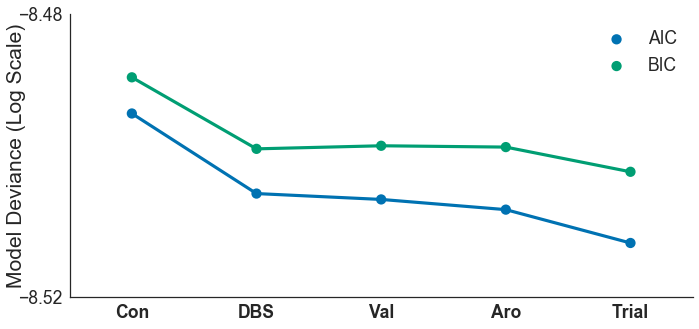

In [15]:
## Build dataframe
variables = np.array(['Con','DBS','Val','Aro','Trial'] * 2)
metrics = np.concatenate([ ['AIC'] * 5, ['BIC'] * 5 ])
fits = DataFrame(dict(Fit = np.concatenate([AICs,BICs]),
                      Model = variables,
                      Metric = metrics))
fits.Fit = np.sign(fits.Fit) * np.log(np.abs(fits.Fit))

## Plotting
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.set(style="white", font_scale=1.75)
g = sns.factorplot(x='Model', y='Fit', hue='Metric', data=fits, 
               palette='colorblind', kind='point', ax=ax, legend=1)

## Flourishes
ax.legend_.set_title(None)
ax.set_xticklabels(fits.Model.unique(), ha='center', weight='bold')
ax.set_xlabel('')
ax.set_yticks(np.linspace(-8.52, -8.48, 2))
ax.set_ylabel('', labelpad=-1.0)
ax.text(-1.0, -8.5, 'Model Deviance (Log Scale)', rotation=90, va='center')

plt.close()
sns.despine()
plt.tight_layout()
plt.show()

### FCZ ERP

In [ ]:
import os
import numpy as np
import pylab as plt
import seaborn as sns
from pandas import read_csv
sns.set_style("white")
sns.set_context('notebook', font_scale=2.5)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## File parameters.
model_name = 'revised'
space = 'sensor'
label = 'FCZ'
freq = 15

## Plotting parameters.
contrasts = ['Interference','DBS']
palettes = [ ['#7b3294','#008837'], ['#0571b0','#ca0020'] ]
annotations = [ ['Control', 'Interference'], ['DBS OFF','DBS ON'] ]
ylims = [(-5.,1.5),(-2.5,2.5)]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Intialize figure.
fig, axes = plt.subplots(2,2,figsize=(12,9))
info = read_csv(os.path.join(space, 'afMSIT_%s_info.csv' %space))

for n, contrast, colors, legends in zip(range(2), contrasts, palettes, annotations):
    
    for m, analysis in enumerate(['stim', 'resp']):
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        ### Load data.
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

        ## Load source data.
        npz = np.load(os.path.join(space, 'afMSIT_%s_%s_%s_%s.npz' %(space,analysis,label,freq)))
        data = npz['data']
        times = npz['times']

        ## Load cluster results.
        f = os.path.join(space, 'results', '%s_%s_timedomain_results.csv' %(model_name, analysis))
        clusters = read_csv(f)
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        ### Plotting.
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

        y1,y2 = ylims[m]
        
        for i, color, legend in zip(range(2),colors,legends):

            ix, = np.where(info[contrast]==i)
            mu = data[ix].mean(axis=0)
            se = data[ix].std(axis=0) / np.sqrt(len(ix))
            axes[n,m].plot(times, mu, linewidth=3, color=color, label=legend)
            axes[n,m].fill_between(times, mu-se, mu+se, color=color, alpha=0.2)

        ## Plot significant clusters.
        axes[n,m].set_ylim(-0.2,0.2)
        for ix in np.where((clusters.Label==label)&(clusters.Freq==freq)&
                           (clusters.Contrast==contrast)&(clusters.FDR<0.05))[0]:
            tmin, tmax = clusters.loc[ix,'Tmin'], clusters.loc[ix,'Tmax']
            axes[n,m].fill_between(np.linspace(tmin,tmax,1e3), y1, y2, color='k', alpha=0.2)    
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Add flourishes.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

for n in range(2):
    
    for m in range(2):
        
        y1,y2 = ylims[m]
        
        ## Stimulus-locked edits.
        if not m:
            
            ## Fix axes.
            xticks = np.array([0.0, 0.4, 0.9, 1.4])
            axes[n,m].set(xticks=xticks, xticklabels=xticks - 0.4, 
                          xlim=(-0.25,1.5), ylabel='FCz Current Density', ylim=(-5,1.5))

            
            ## Add markers.
            for x,s in zip([0, 0.4, 1.127],['IAPS','MSIT','Resp']): 
                axes[n,m].text(x+0.02,y1+np.abs(y1*0.05),s,fontsize=22)
                axes[n,m].vlines(x,y1,y2,linestyle='--',alpha=0.3)
                
        ## Response-locked edits.
        else:
                        
            ## Fix axes.
            xticks = np.array([-1.0, -0.5, 0.0, 0.5, 1.0])
            axes[n,m].set(xticks=xticks, xlim=(-1.0, 1.0), ylim=(-2.5,2.5))
                        
            ## Add markers
            axes[n,m].text(0.02,y1+np.abs(y1*0.05),'Resp',fontsize=22)
            axes[n,m].vlines(0.0,-2.5,2.5,linestyle='--',alpha=0.3)
        
            ## Add legends above plot.
            axes[n,m].legend(loc=1, handlelength=1.2, handletextpad=0.5, 
                             labelspacing=0.1, borderpad=0)
        
        ## Add y-labels.
        if n: axes[n,m].set_xlabel('Time (s)')
            

sns.despine()
plt.tight_layout()
plt.savefig('plots/manuscript/supplementary/fcz.png')
plt.show()
plt.close()